In [49]:
import onnx

model = onnx.load("train/mnist_ffn_complex.onnx")

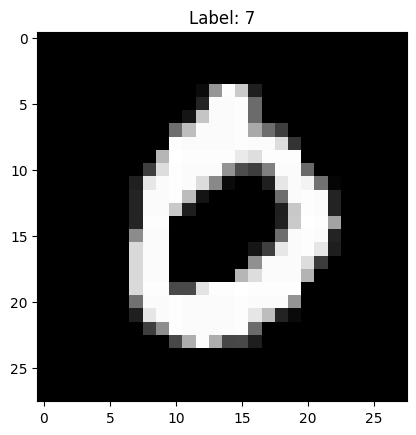

In [50]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch

transform = transforms.Compose([transforms.ToTensor()])
test_loader = torch.utils.data.DataLoader(datasets.MNIST('./train/data', train=False, transform=transform),
                                        batch_size=1000, shuffle=False)
# Extract a single image from the validation set
data_iter = iter(test_loader)
images, labels = next(data_iter)
image = images[3].numpy().squeeze()

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {labels[0].item()}')
plt.show()

In [51]:
image.shape

(28, 28)

In [52]:
from engine import *

mod = model("train/mnist_ffn_complex.onnx")

In [53]:
res = list(mod.infer(image).flatten())
print(res.index(max(res)))

0
